In [58]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings

In [59]:
data = pd.read_csv('data.csv')

In [60]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [61]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [62]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [64]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [65]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
data.shape

(1025, 14)

In [67]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
categorical = []
nonCategorical = []

for column in data:
    print('--------------------------------------------------------')
    print(f'{column} : {data[column].unique()}')
    if len(data[column].unique())<=10:
        categorical.append(column)
    else:
        nonCategorical.append(column)

--------------------------------------------------------
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
--------------------------------------------------------
sex : [1 0]
--------------------------------------------------------
cp : [0 1 2 3]
--------------------------------------------------------
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
--------------------------------------------------------
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 2

In [69]:
print(f'categorical Data : {categorical}')
print(f'Non-Categorical Data : {nonCategorical}')

categorical Data : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Non-Categorical Data : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [70]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot: >

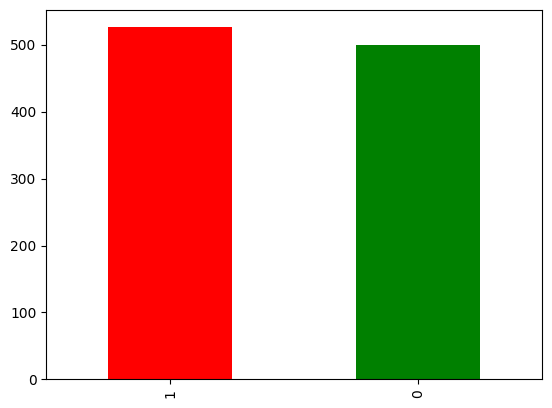

In [71]:
data.target.value_counts().plot(kind='bar' , color=['red' , 'green'])

In [72]:
X = data.iloc[:, 1:13].values
y = data['target'].values
X[0]



array([  1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,   2.,
         3.])

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , stratify=data['target'])


1.knn

In [74]:
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
pickle.dump(KNN_clf, open('knn_trained_model.pkl', 'wb'))

In [76]:
KNN_model = pickle.load(open('knn_trained_model.pkl', 'rb'))

In [77]:
Y_pred_knn = KNN_model.predict(X_test)
Y_pred_knn

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [78]:
test_data_accuracy1 = accuracy_score(Y_pred_knn, y_test)
print('Accuracy on Test data : ', round(test_data_accuracy1,2))

Accuracy on Test data :  0.89


In [79]:
print("\n-------------> KNN Classification REPORT <-------------\n")
print(classification_report(y_test, Y_pred_knn))


-------------> KNN Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       100
           1       0.89      0.90      0.90       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



2.decsion tree

In [80]:
D_Tree_clf = DecisionTreeClassifier(criterion='entropy' ,random_state=0)
D_Tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [81]:
pickle.dump(D_Tree_clf, open('dt_trained_model.pkl', 'wb'))

In [82]:
DT_model = pickle.load(open('dt_trained_model.pkl', 'rb'))

In [83]:
Y_pred_dt = DT_model.predict(X_test)
Y_pred_dt

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [84]:
test_data_accuracy3 = accuracy_score(Y_pred_dt, y_test)
print('Accuracy on Test data : ', round(test_data_accuracy3,2))

Accuracy on Test data :  1.0


In [85]:
print("\n-------------> Decision Tree Classification REPORT <-------------\n")
print(classification_report(y_test, Y_pred_dt))


-------------> Decision Tree Classification REPORT <-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



3.naive byse

In [86]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [87]:
pickle.dump(cnb, open('cnb_trained_model.pkl', 'wb'))

In [88]:
gnb_model = pickle.load(open('cnb_trained_model.pkl', 'rb'))

In [89]:
Y_pred_cnb = gnb_model.predict(X_test)
Y_pred_cnb

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [90]:

test_data_accuracy4 = accuracy_score(Y_pred_cnb, y_test)
print('Accuracy on Test data : ', round(test_data_accuracy4,2))

Accuracy on Test data :  0.89


In [91]:
print("\n-------------> CNB Classification REPORT <-------------\n")
print(classification_report(y_test, Y_pred_cnb))


-------------> CNB Classification REPORT <-------------

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       100
           1       0.87      0.91      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [92]:
print("KNN Accuracy = ", round(test_data_accuracy1,2)*100, "%")
print("DT Accuracy = ", round(test_data_accuracy3,2)*100, "%")
print("CNB Accuracy = ", round(test_data_accuracy4,2)*100, "%")

KNN Accuracy =  89.0 %
DT Accuracy =  100.0 %
CNB Accuracy =  89.0 %
